## 绘制 Bezier 曲线

## 贝塞尔曲线
- https://blog.csdn.net/qq_33885275/article/details/114682191

[0 0 1 1]


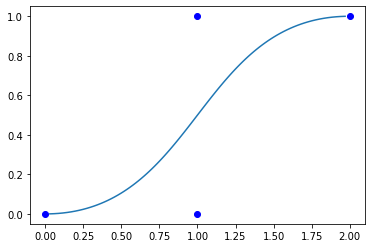

In [1]:

from matplotlib import pyplot
import numpy as np
points = [
    [0,0],
    [1,0],
    [1, 1],
    [2,1]
]

points = np.array(points)



# 通过递归构造贝塞尔曲线
def calNextPoints(points, rate): # 如果给定了具体的n， 那么可以直接得到计算方程
    if len(points) == 1:
        return points

    left = points[0]
    ans = []
    for i in range(1, len(points)): # 根据比例计算当前的点的坐标，一层层的推进
        right = points[i]
        disX = right[0] - left[0]
        disY = right[1] - left[1]

        nowX = left[0] + disX * rate
        nowY = left[1] + disY * rate
        ans.append([nowX, nowY])

        # 更新left
        left = right

    return calNextPoints(ans, rate)

X= []
Y = []
for r in range(1, 100):
    r = r / 100
    a = calNextPoints(points, rate=r)
    # print(a)
    x = a[0][0]
    y = a[0][1]
    X.append(x)
    Y.append(y)


print(points[:,1])
pyplot.scatter(points[:,0], points[:,1], c='blue')
pyplot.plot(X, Y)

pyplot.show()


## 关于贝塞尔曲线的公式推导和python代码实现
- https://zhuanlan.zhihu.com/p/203408475

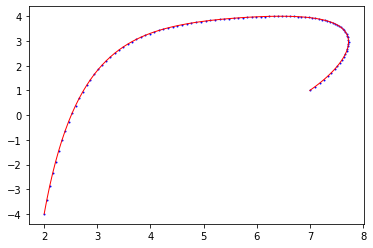

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def B_nx(n, i, x):
    if i > n:
        return 0
    elif i == 0:
        return (1-x)**n
    elif i == 1:
        return n*x*((1-x)**(n-1))
    return B_nx(n-1, i, x)*(1-x)+B_nx(n-1, i-1, x)*x

def get_value(p, canshu):
    sumx = 0.
    sumy = 0.
    length = len(p)-1
    for i in range(0, len(p)):
        sumx += (B_nx(length, i, canshu) * p[i][0])
        sumy += (B_nx(length, i, canshu) * p[i][1])
    return sumx, sumy

def get_newxy(p,x):
    xx = [0] * len(x)
    yy = [0] * len(x)
    for i in range(0, len(x)):
        # print('x[i]=', x[i])
        a, b = get_value(p, x[i])
        xx[i] = a
        yy[i] = b
        # print('xx[i]=', xx[i])
    return xx, yy

p = np.array([                           #控制点，控制贝塞尔曲线的阶数n
    [2, -4],
    [3, 8],
    [5, 1],
    [7, 6],
    [9, 4],
    [7, 1],
])

x = np.linspace(0, 1, 101)
xx, yy = get_newxy(p, x)
plt.plot(xx, yy, 'r', linewidth=1)       # 最终拟合的贝塞尔曲线
plt.scatter(xx[:], yy[:], 1, "blue")     #散点图,表示采样点
plt.show()

## 轨迹规划：贝塞尔曲线的python实现
- https://blog.csdn.net/weixin_39258979/article/details/108083655

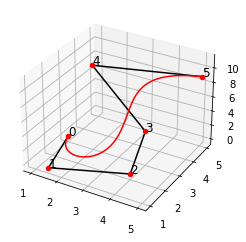

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math

class Bezier:
    # 输入控制点，Points是一个array,num是控制点间的插补个数
    def __init__(self,Points,InterpolationNum):
        self.demension=Points.shape[1]   # 点的维度
        self.order=Points.shape[0]-1     # 贝塞尔阶数=控制点个数-1
        self.num=InterpolationNum        # 相邻控制点的插补个数
        self.pointsNum=Points.shape[0]   # 控制点的个数
        self.Points=Points
        
    # 获取Bezeir所有插补点
    def getBezierPoints(self,method):
        if method==0:
            return self.DigitalAlgo()
        if method==1:
            return self.DeCasteljauAlgo()
    
    # 数值解法
    def DigitalAlgo(self):
        PB=np.zeros((self.pointsNum,self.demension)) # 求和前各项
        pis =[]                                      # 插补点
        for u in np.arange(0,1+1/self.num,1/self.num):
            for i in range(0,self.pointsNum):
                PB[i]=(math.factorial(self.order)/(math.factorial(i)*math.factorial(self.order-i)))*(u**i)*(1-u)**(self.order-i)*self.Points[i]
            pi=sum(PB).tolist()                      #求和得到一个插补点
            pis.append(pi)            
        return np.array(pis)

    # 德卡斯特里奥解法
    def DeCasteljauAlgo(self):
        pis =[]                          # 插补点
        for u in np.arange(0,1+1/self.num,1/self.num):
            Att=self.Points
            for i in np.arange(0,self.order):
                for j in np.arange(0,self.order-i):
                    Att[j]=(1.0-u)*Att[j]+u*Att[j+1]
            pis.append(Att[0].tolist())

        return np.array(pis)

class Line:
    def __init__(self,Points,InterpolationNum):
        self.demension=Points.shape[1]    # 点的维数
        self.segmentNum=InterpolationNum-1 # 段数
        self.num=InterpolationNum         # 单段插补(点)数
        self.pointsNum=Points.shape[0]   # 点的个数
        self.Points=Points                # 所有点信息
        
    def getLinePoints(self):
        # 每一段的插补点
        pis=np.array(self.Points[0])
        # i是当前段
        for i in range(0,self.pointsNum-1):
            sp=self.Points[i]
            ep=self.Points[i+1]
            dp=(ep-sp)/(self.segmentNum)# 当前段每个维度最小位移
            for i in range(1,self.num):
                pi=sp+i*dp
                pis=np.vstack((pis,pi))         
        return pis

points=np.array([
    [1,3,0],
    [1.5,1,0],
    [4,2,0],
    [4,3,4],
    [2,3,11],
    [5,5,9]
    ])

# points=np.array([
#     [0.0,0.0],
#     [1.0,0.0],
#     [1.0,1.0],
#     [0.0,1.0],
#     ])
    


if points.shape[1]==3:
    
        fig=plt.figure()
        #ax = fig.gca(projection='3d')
        ax = fig.add_subplot(projection='3d')
        # https://blog.csdn.net/qq_38048756/article/details/119985988
        
        # 标记控制点
        for i in range(0,points.shape[0]):
            ax.scatter(points[i][0],points[i][1],points[i][2],marker='o',color='r')
            ax.text(points[i][0],points[i][1],points[i][2],i,size=12)
        
        # 直线连接控制点
        l=Line(points,1000)
        pl=l.getLinePoints()
        ax.plot3D(pl[:,0],pl[:,1],pl[:,2],color='k')
        
        # 贝塞尔曲线连接控制点
        bz=Bezier(points,1000)
        matpi=bz.getBezierPoints(0)
        ax.plot3D(matpi[:,0],matpi[:,1],matpi[:,2],color='r')
        plt.show()
if points.shape[1]==2:  
    
        # 标记控制点
        for i in range(0,points.shape[0]):
                plt.scatter(points[i][0],points[i][1],marker='o',color='r')
                plt.text(points[i][0],points[i][1],i,size=12)
                
         # 直线连接控制点
        l=Line(points,1000)
        pl=l.getLinePoints()
        plt.plot(pl[:,0],pl[:,1],color='k')
        
        # 贝塞尔曲线连接控制点
        bz=Bezier(points,1000)
        matpi=bz.getBezierPoints(1)
        plt.plot(matpi[:,0],matpi[:,1],color='r')
        plt.show()


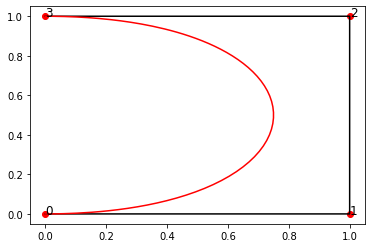

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

class Bezier:
    # 输入控制点，Points是一个array,num是控制点间的插补个数
    def __init__(self,Points,InterpolationNum):
        self.demension=Points.shape[1]   # 点的维度
        self.order=Points.shape[0]-1     # 贝塞尔阶数=控制点个数-1
        self.num=InterpolationNum        # 相邻控制点的插补个数
        self.pointsNum=Points.shape[0]   # 控制点的个数
        self.Points=Points
        
    # 获取Bezeir所有插补点
    def getBezierPoints(self,method):
        if method==0:
            return self.DigitalAlgo()
        if method==1:
            return self.DeCasteljauAlgo()
    
    # 数值解法
    def DigitalAlgo(self):
        PB=np.zeros((self.pointsNum,self.demension)) # 求和前各项
        pis =[]                                      # 插补点
        for u in np.arange(0,1+1/self.num,1/self.num):
            for i in range(0,self.pointsNum):
                PB[i]=(math.factorial(self.order)/(math.factorial(i)*math.factorial(self.order-i)))*(u**i)*(1-u)**(self.order-i)*self.Points[i]
            pi=sum(PB).tolist()                      #求和得到一个插补点
            pis.append(pi)            
        return np.array(pis)

    # 德卡斯特里奥解法
    def DeCasteljauAlgo(self):
        pis =[]                          # 插补点
        for u in np.arange(0,1+1/self.num,1/self.num):
            Att=self.Points
            for i in np.arange(0,self.order):
                for j in np.arange(0,self.order-i):
                    Att[j]=(1.0-u)*Att[j]+u*Att[j+1]
            pis.append(Att[0].tolist())

        return np.array(pis)

class Line:
    def __init__(self,Points,InterpolationNum):
        self.demension=Points.shape[1]    # 点的维数
        self.segmentNum=InterpolationNum-1 # 段数
        self.num=InterpolationNum         # 单段插补(点)数
        self.pointsNum=Points.shape[0]   # 点的个数
        self.Points=Points                # 所有点信息
        
    def getLinePoints(self):
        # 每一段的插补点
        pis=np.array(self.Points[0])
        # i是当前段
        for i in range(0,self.pointsNum-1):
            sp=self.Points[i]
            ep=self.Points[i+1]
            dp=(ep-sp)/(self.segmentNum)# 当前段每个维度最小位移
            for i in range(1,self.num):
                pi=sp+i*dp
                pis=np.vstack((pis,pi))         
        return pis

# points=np.array([
#     [1,3,0],
#     [1.5,1,0],
#     [4,2,0],
#     [4,3,4],
#     [2,3,11],
#     [5,5,9]
#     ])

points=np.array([
    [0.0,0.0],
    [1.0,0.0],
    [1.0,1.0],
    [0.0,1.0],
    ])
    


if points.shape[1]==3:
    
        fig=plt.figure()
        #ax = fig.gca(projection='3d')
        ax = fig.add_subplot(projection='3d')
        # https://blog.csdn.net/qq_38048756/article/details/119985988
        
        # 标记控制点
        for i in range(0,points.shape[0]):
            ax.scatter(points[i][0],points[i][1],points[i][2],marker='o',color='r')
            ax.text(points[i][0],points[i][1],points[i][2],i,size=12)
        
        # 直线连接控制点
        l=Line(points,1000)
        pl=l.getLinePoints()
        ax.plot3D(pl[:,0],pl[:,1],pl[:,2],color='k')
        
        # 贝塞尔曲线连接控制点
        bz=Bezier(points,1000)
        matpi=bz.getBezierPoints(0)
        ax.plot3D(matpi[:,0],matpi[:,1],matpi[:,2],color='r')
        plt.show()
if points.shape[1]==2:  
    
        # 标记控制点
        for i in range(0,points.shape[0]):
                plt.scatter(points[i][0],points[i][1],marker='o',color='r')
                plt.text(points[i][0],points[i][1],i,size=12)
                
         # 直线连接控制点
        l=Line(points,1000)
        pl=l.getLinePoints()
        plt.plot(pl[:,0],pl[:,1],color='k')
        
        # 贝塞尔曲线连接控制点
        bz=Bezier(points,1000)
        matpi=bz.getBezierPoints(1)
        plt.plot(matpi[:,0],matpi[:,1],color='r')
        plt.show()
